In [61]:
import serial,time
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
import os
import pandas as pd
import scipy.stats as stats
from colorama import Fore, Style

## Carga y gráfica de los Electromiogramas:

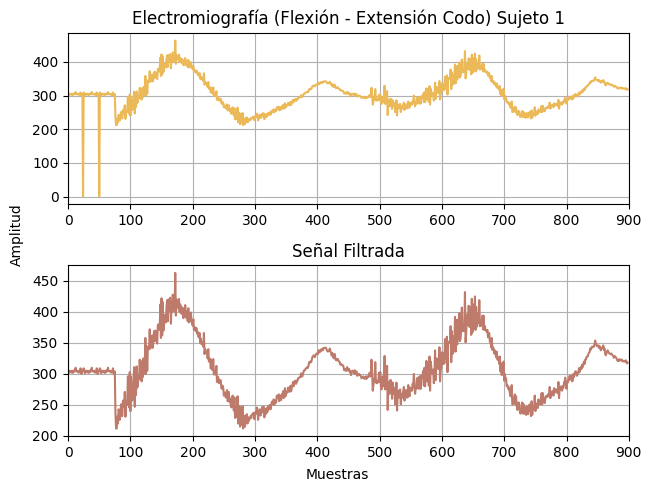

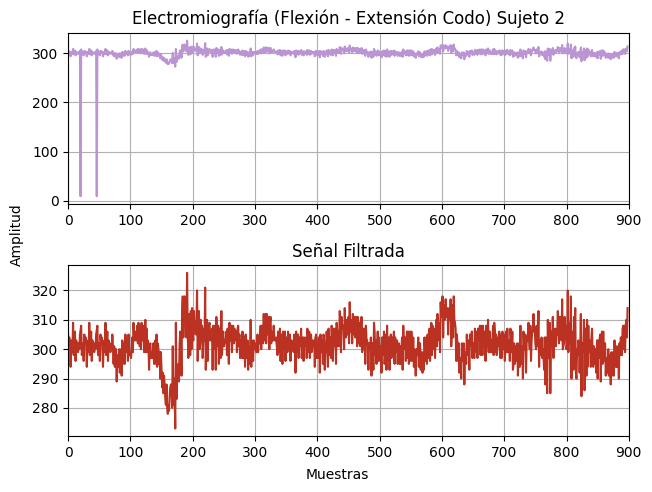

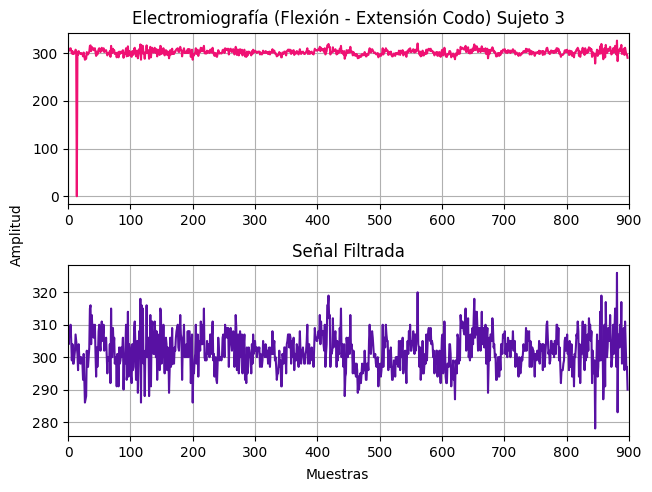

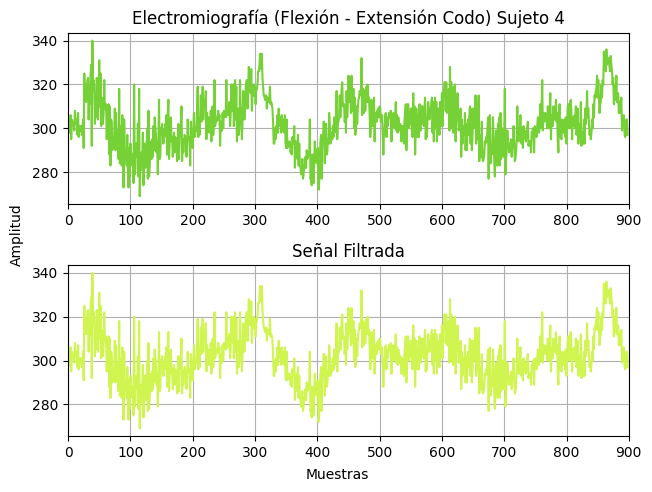

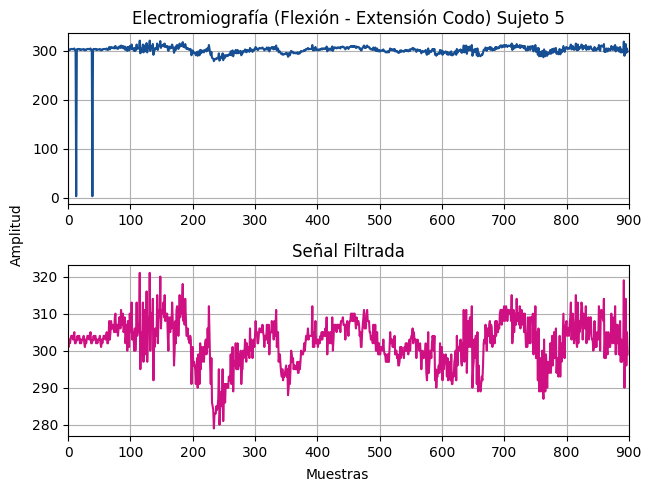

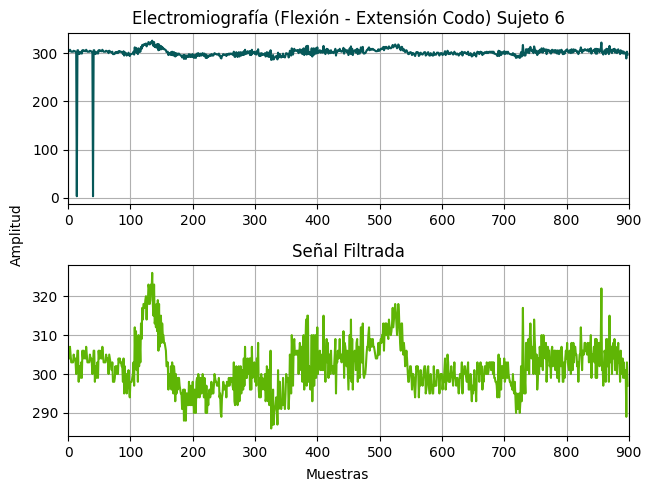

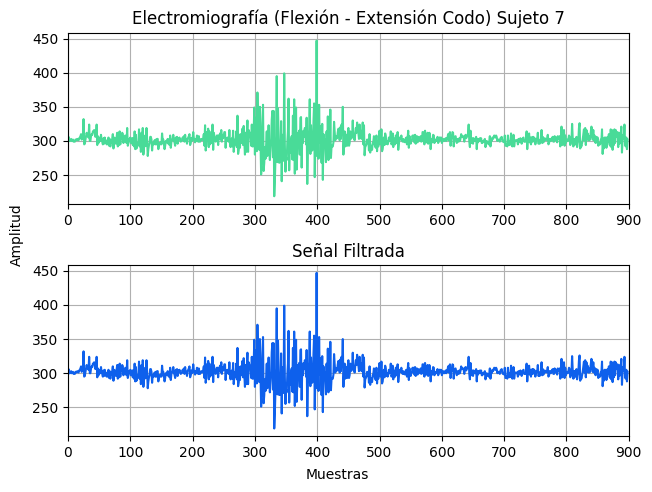

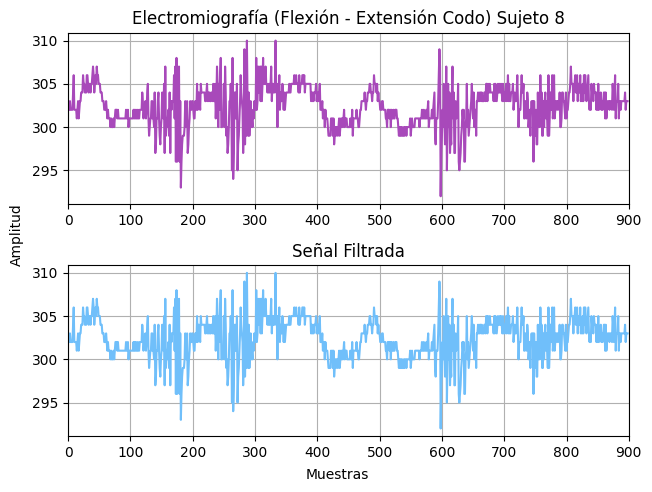

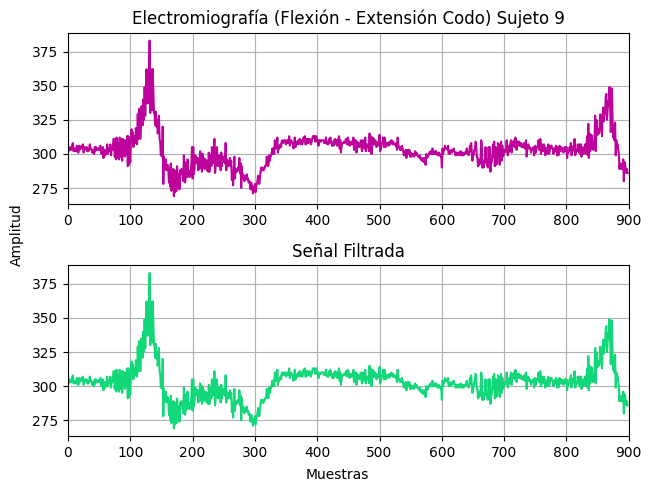

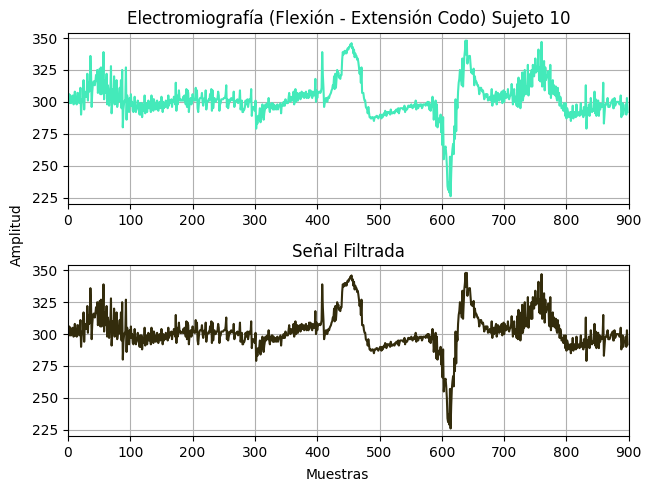

,Sujeto 1,Sujeto 2,Sujeto 3,Sujeto 4,Sujeto 5,Sujeto 6,Sujeto 7,Sujeto 8,Sujeto 9,Sujeto 10
0,307,305,309,298,302,305,302,302,304,299
1,301,302,304,301,301,304,306,302,302,302
2,304,304,309,298,303,304,300,302,304,306
3,303,302,307,301,302,307,300,303,305,299
4,305,294,310,306,303,305,301,302,303,305
...,...,...,...,...,...,...,...,...,...,...
886,323,304,306,307,303,300,312,303,293,298
887,323,298,317,310,297,302,310,302,293,305
888,320,307,298,314,298,304,321,303,289,288
889,321,308,301,299,300,299,283,303,291,291


In [62]:
sujetos=np.arange(1,11)
sujetos=sujetos.astype(str)
database={}
for i in sujetos:
    df = pd.read_excel('sujeto{}.xlsx'.format(i))
    df_filtrada=df[(df >= 10).all(axis=1)]
    color1=np.random.rand(1,3)
    color2=np.random.rand(1,3)
    fig,axs = plt.subplots(2,1)
    axs[0].plot(df,color=color1)
    axs[0].set_title('Electromiografía (Flexión - Extensión Codo) Sujeto {}'.format(i))
    axs[0].grid(True)
    axs[0].set_xlim(0,900)
    axs[0].set_xticks(range(0,901,100))
    axs[1].plot(df_filtrada,color=color2)
    axs[1].grid(True)
    axs[1].set_xlim(0,900)
    axs[1].set_xticks(range(0,901, 100))
    axs[1].set_title('Señal Filtrada')
    fig.text(0.5, 0, 'Muestras', ha='center', va='center')
    fig.text(0, 0.5, 'Amplitud', ha='center', va='center', rotation='vertical')
    plt.tight_layout()
    plt.show()
    database['Sujeto {}'.format(i)]=df_filtrada.iloc[:891, 0].tolist()
data_base=pd.DataFrame(database)
display(data_base)

## Pruebas Estadísticas:
### (Las hipotesis formuladas y el análisis de resultados de cada prueba se encuentran en el numeral 4 del informe anexo)

In [63]:
def RMS(signal):
    return np.sqrt(np.mean(signal**2))

def Varianza(signal):
    return np.var(signal)

def MeanAbsoluteValue(signal):
    return np.mean(np.abs(signal))

def MeanAbsoluteValueSlope(signal):
    return np.mean(np.abs(np.diff(signal)))

def SlopeSignChanges(signal):
    return np.sum(np.diff(np.sign(signal)) != 0)

def WaveformLength(signal):
    return np.sum(np.abs(np.diff(signal)))

def ZeroCrossing(signal):
    return np.sum(np.abs(np.diff(np.sign(signal)))) / 2.0

resultados = {}

for sujeto in data_base.columns:
    signal = data_base[sujeto].values    
    resultados[sujeto] = {'RMS': RMS(signal),
        'Varianza': Varianza(signal),
        'Mean Absolute Value': MeanAbsoluteValue(signal),
        'Mean Absolute Value Slope': MeanAbsoluteValueSlope(signal),
        'Slope Sign Changes': SlopeSignChanges(signal),
        'Waveform Length': WaveformLength(signal),
        'Zero Crossing': ZeroCrossing(signal)}
resultados_df = pd.DataFrame(resultados).transpose()
display(resultados_df)

,RMS,Varianza,Mean Absolute Value,Mean Absolute Value Slope,Slope Sign Changes,Waveform Length,Zero Crossing
Sujeto 1,309.755769,2182.773186,306.212121,11.173034,0.0,9944.0,0.0
Sujeto 2,301.738299,40.514757,301.671156,6.596629,0.0,5871.0,0.0
Sujeto 3,302.093292,33.307186,302.038159,5.293258,0.0,4711.0,0.0
Sujeto 4,302.644556,133.983708,302.423120,8.241573,0.0,7335.0,0.0
Sujeto 5,302.338710,37.858677,302.276094,3.688764,0.0,3283.0,0.0
Sujeto 6,302.130746,36.953632,302.069585,3.826966,0.0,3406.0,0.0
Sujeto 7,302.736350,236.387801,302.345679,14.075281,0.0,12527.0,0.0
Sujeto 8,302.429055,5.626276,302.419753,1.628090,0.0,1449.0,0.0
Sujeto 9,303.463031,149.498534,303.216611,5.223596,0.0,4649.0,0.0
Sujeto 10,302.685585,208.368438,302.341190,5.905618,0.0,5256.0,0.0


In [64]:
sujetos = []
shapiro_statistic = []
shapiro_p_value = []
shapiro_result = []
for sujeto in data_base.columns:
    signal = data_base[sujeto].values    
    stat_shapiro, p_shapiro = stats.shapiro(signal)    
    if p_shapiro > 0.05:
        shapiro_result.append('⊙')
    else:
        shapiro_result.append('⊘')    
    sujetos.append(f"Sujeto {len(sujetos) + 1}")
    shapiro_statistic.append(stat_shapiro)
    shapiro_p_value.append(p_shapiro)    
resultados_shapiro = pd.DataFrame({
    'Estadística Shapiro': shapiro_statistic,
    'Valor P': shapiro_p_value,
    'Normalidad': shapiro_result
}, index=sujetos)
print(Fore.RED+Style.BRIGHT + 'Prueba de Shapiro-Wilk' + Style.RESET_ALL)
display(resultados_shapiro)

Prueba de Shapiro-Wilk


,Estadística Shapiro,Valor P,Normalidad
Sujeto 1,0.978348,3.121874e-10,⊘
Sujeto 2,0.981666,3.869113e-09,⊘
Sujeto 3,0.993221,4.472544e-04,⊘
Sujeto 4,0.996474,4.356073e-02,⊘
Sujeto 5,0.978090,2.594351e-10,⊘
Sujeto 6,0.976029,6.177360e-11,⊘
Sujeto 7,0.824781,4.272850e-30,⊘
Sujeto 8,0.971053,2.603985e-12,⊘
Sujeto 9,0.892127,1.797669e-24,⊘
Sujeto 10,0.894983,3.530568e-24,⊘


In [65]:
resultados_mannwhitneyu = pd.DataFrame(index=sujetos, columns=sujetos)
for i, sujeto in enumerate(data_base.columns):
    for otro_sujeto in data_base.columns:
        if sujeto != otro_sujeto:
            if i == data_base.columns.get_loc(otro_sujeto):
                resultados_mannwhitneyu.at[sujetos[i], sujetos[data_base.columns.get_loc(otro_sujeto)]] = 'X'
            else:
                _, p_mannwhitney = stats.mannwhitneyu(data_base[sujeto], data_base[otro_sujeto])
                resultados_mannwhitneyu.at[sujetos[i], sujetos[data_base.columns.get_loc(otro_sujeto)]] = p_mannwhitney

resultados_mannwhitneyu.fillna('⊗', inplace=True)
print(Fore.GREEN+Style.BRIGHT + 'Prueba U de Mann-Whitney' + Style.RESET_ALL)
display(resultados_mannwhitneyu)

Prueba U de Mann-Whitney


,Sujeto 1,Sujeto 2,Sujeto 3,Sujeto 4,Sujeto 5,Sujeto 6,Sujeto 7,Sujeto 8,Sujeto 9,Sujeto 10
Sujeto 1,⊗,0.507631,0.650318,0.872191,0.990005,0.566987,0.664466,0.683125,0.572004,0.514137
Sujeto 2,0.507631,⊗,0.5958,0.346297,0.007658,0.74973,0.928911,0.01786,0.000199,0.030808
Sujeto 3,0.650318,0.5958,⊗,0.728223,0.029149,0.351089,0.64375,0.018505,0.00096,0.004723
Sujeto 4,0.872191,0.346297,0.728223,⊗,0.558709,0.543024,0.613043,0.457561,0.165912,0.194866
Sujeto 5,0.990005,0.007658,0.029149,0.558709,⊗,0.003288,0.063214,0.079527,0.105797,0.000084
Sujeto 6,0.566987,0.74973,0.351089,0.543024,0.003288,⊗,0.945588,0.000089,0.000136,0.021261
Sujeto 7,0.664466,0.928911,0.64375,0.613043,0.063214,0.945588,⊗,0.02024,0.008868,0.137351
Sujeto 8,0.683125,0.01786,0.018505,0.457561,0.079527,0.000089,0.02024,⊗,0.000828,0.0
Sujeto 9,0.572004,0.000199,0.00096,0.165912,0.105797,0.000136,0.008868,0.000828,⊗,0.000086
Sujeto 10,0.514137,0.030808,0.004723,0.194866,0.000084,0.021261,0.137351,0.0,0.000086,⊗


In [66]:
levene_stat, p_value = stats.levene(data_base['Sujeto 1'], data_base['Sujeto 2'], data_base['Sujeto 3'], data_base['Sujeto 4'], data_base['Sujeto 5'],
                                   data_base['Sujeto 6'], data_base['Sujeto 7'], data_base['Sujeto 8'], data_base['Sujeto 9'],
                                   data_base['Sujeto 10'])
status = ''
if p_value < 0.05:
    status = '⊘'
else:
    status = '⊙'
levene_df = pd.DataFrame({'Estadística': levene_stat, 'Valor P': p_value, 'Homocedasticidad': status}, index=["Valor"])
print(Fore.BLUE+Style.BRIGHT + 'Prueba de Levene' + Style.RESET_ALL)
display(levene_df)

Prueba de Levene


,Estadística,Valor P,Homocedasticidad
Valor,662.754016,0.0,⊘
